# ParallelBNs: Experimentos 28/03/2022

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_info_rows = 30000000

sns.set_theme(style='darkgrid')

# Tamaño figuras
plt.rcParams["figure.figsize"] = (20,8)

In [3]:
df = pd.read_csv('results.csv')
df['threads'] = pd.Categorical(df.threads)
df

,algorithm,network,bbdd,threads,interleaving,seed,SHD,LL Score,BDeu Score,dfMM,dfMM plus,dfMM minus,Total iterations,Total time(s)
0,GES_BNBuilder,andes,andes.xbif50001246_,1,-1,-1,188,-0.418554,-475749.534899,410.0,54.0,356.0,1,1509.460
1,PGESwithStages,andes,andes.xbif50001246_,2,5,11,168,-0.538610,-474899.621927,362.0,20.0,342.0,40,692.257
2,PGESwithStages,andes,andes.xbif50001246_,2,5,13,175,-0.547358,-475160.791631,394.0,50.0,344.0,39,693.709
3,PGESwithStages,andes,andes.xbif50001246_,2,5,17,169,-0.547395,-474990.791651,366.0,18.0,348.0,39,669.192
4,PGESwithStages,andes,andes.xbif50001246_,2,5,19,161,-0.537651,-474732.528017,348.0,10.0,338.0,38,614.257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,PGESwithStages,andes,andes.xbif_,8,5,23,199,-0.541485,-476429.339200,436.0,58.0,378.0,14,250.678
442,PGESwithStages,andes,andes.xbif_,8,5,29,170,-0.541462,-475640.888055,370.0,32.0,338.0,14,240.908
443,PGESwithStages,andes,andes.xbif_,8,5,3,174,-0.544253,-476013.080763,378.0,26.0,352.0,15,252.643
444,PGESwithStages,andes,andes.xbif_,8,5,5,175,-0.545344,-475567.146111,382.0,34.0,348.0,14,243.526


### (Threads==1 es GES, Threads>1 es PGES)

Media

In [26]:
df.groupby(["threads"]).mean().drop(["interleaving", "seed"],axis=1)

,SHD,LL Score,BDeu Score,dfMM,dfMM plus,dfMM minus,Total iterations,Total time(s)
threads,,,,,,,,
1,177.181818,-0.419304,-476519.158076,384.545455,34.909091,349.636364,1.000000,1509.760364
2,169.545455,-0.544953,-475212.314592,367.963636,23.872727,344.090909,39.254545,682.600055
4,170.925926,-0.544977,-475241.576224,373.537037,33.259259,340.277778,23.583333,344.338833
6,179.045872,-0.544230,-475580.674617,393.871560,48.238532,345.633028,18.504587,290.124532
8,180.500000,-0.543819,-475672.512268,399.333333,54.037037,345.296296,15.657407,274.506046


Desviación estándar

In [4]:
df.groupby(["threads"]).std().drop(["interleaving", "seed"],axis=1)

,SHD,LL Score,BDeu Score,dfMM,dfMM plus,dfMM minus,Total iterations,Total time(s)
threads,,,,,,,,
1,8.352463,0.001393,1635.090178,19.536446,14.265024,13.764249,0.000000,50.811555
2,20.768553,0.003698,1011.084473,43.363183,13.325226,41.966685,2.320378,53.060342
4,11.850867,0.003425,652.210140,27.975432,20.839561,16.154530,1.793680,37.006459
6,12.739836,0.003597,721.540307,30.886021,22.897072,17.828743,1.984308,40.072324
8,12.497850,0.002506,618.572808,29.785526,21.711759,16.865194,2.042365,43.591748


#### BDeu y tiempo de ejecución por número de hilos: 

Text(0.5, 1.0, 'BDeu')

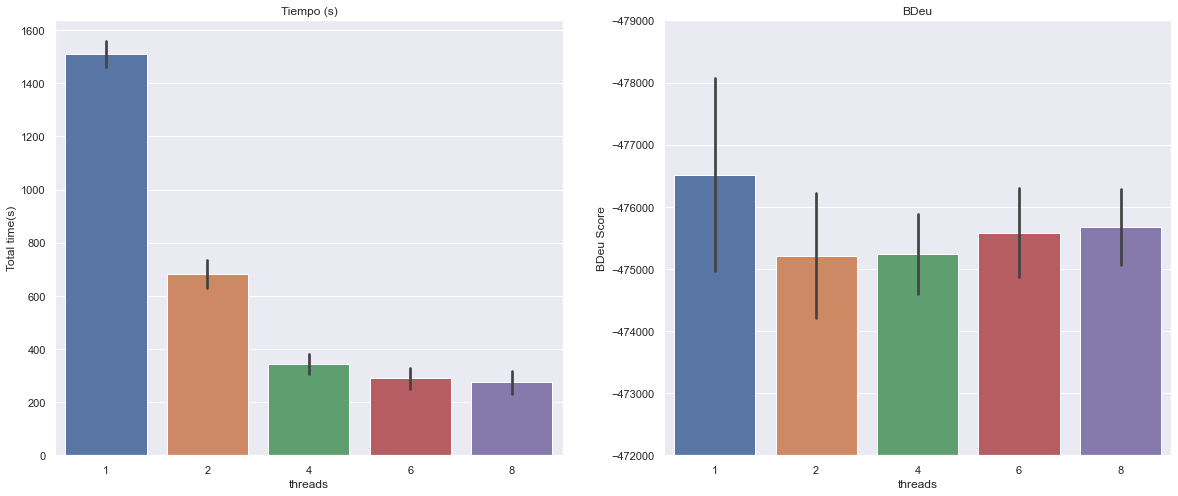

In [31]:
fig, axs = plt.subplots(ncols=2)
sns.barplot(data=df, x="threads", y='Total time(s)', ax=axs[0], ci="sd")
plt.ylim(-472000,-479000)
sns.barplot(data=df, x="threads", y='BDeu Score', ax=axs[1], ci="sd")
axs[0].set_title('Tiempo (s)')
axs[1].set_title('BDeu')

#### Tiempo de ejecución:

Text(0.5, 1.0, 'Tiempo por número de hilos (1 = GES)')

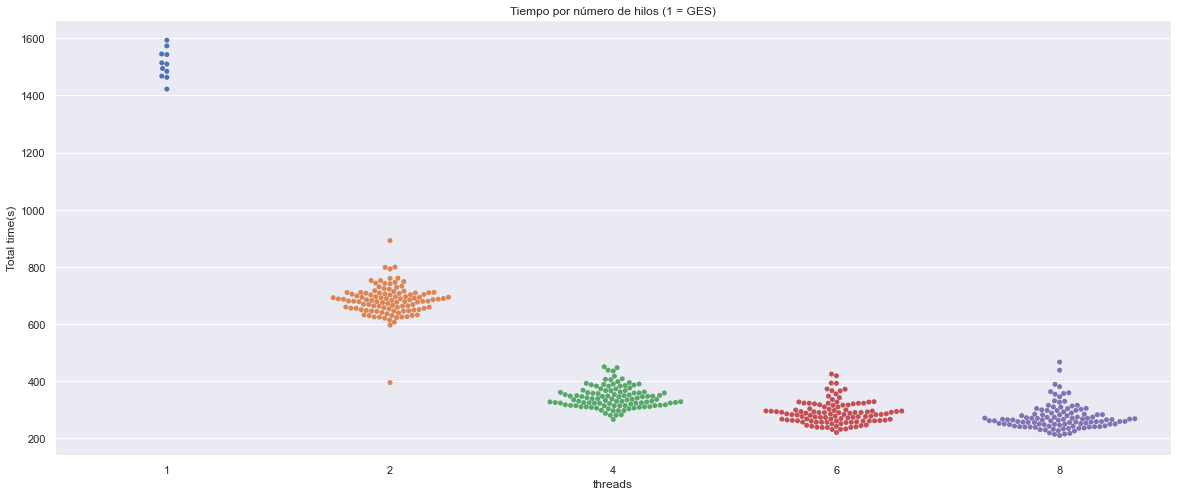

In [43]:
sns.swarmplot(data=df, x='threads', y='Total time(s)').set_title('Tiempo por número de hilos (1 = GES)')

#### BDeu:

Text(0.5, 1.0, 'BDeu por número de hilos (1 = GES)')

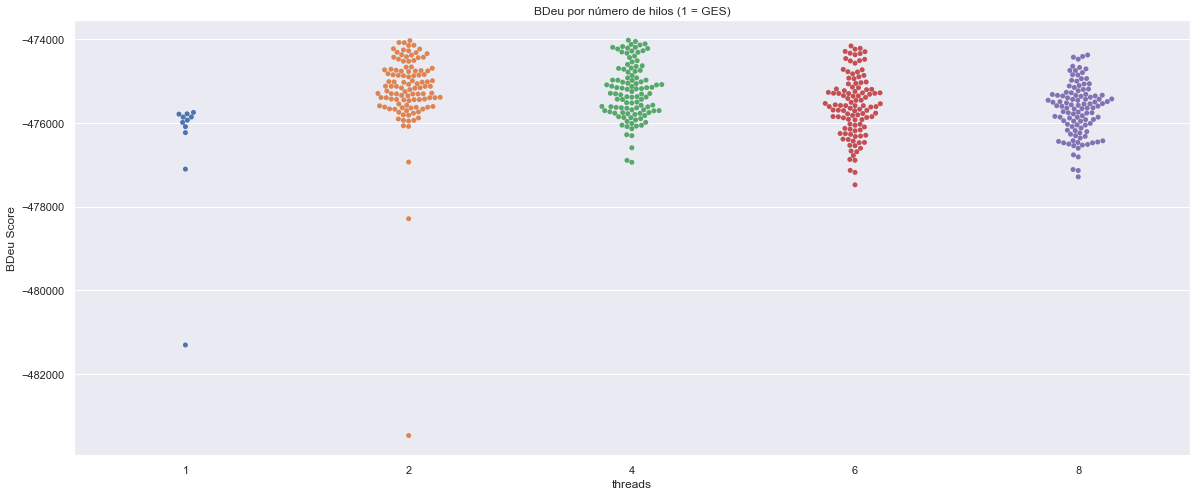

In [42]:
sns.swarmplot(data=df, x='threads', y='BDeu Score').set_title('BDeu por número de hilos (1 = GES)')